<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/Another_copy_of_Stock_Market_Prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock market prediction using LSTM
Download these [datasets]("https://github.com/murpi/wilddata/blob/master/quests/dax/"). Build an LSTM model to forecast the evolution of the stocks price on the German stock market (DAX).

Plot your model's predictions against the actual stock values.




https://blog.faradars.org/stock-market-prediction-using-python-keras/

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Date - This contains date + time at the instant of trade

Open - Open is the price when the stock began

High - Maximum price at the given time period

Low - Minimum price at the given time period

Close - Price at which stock ended

Volume - It is the total amount of trading activity

Adjusted closing price - last lot of the stock is bought or sold in the last trading session


In [ ]:
# URL of the CSV file
url = "https://github.com/murpi/wilddata/raw/master/quests/dax/dax_test_2019.csv.txt"

# Reading the CSV file with handling bad lines
try:
    dax_test_2019 = pd.read_csv(url, on_bad_lines='skip')
    print(dax_test_2019.head())
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")


         date       open       high        Low      close  adj_close  volume
0  2019-06-03  25.660000  25.830000  25.650000  25.825001  24.876635   10700
1  2019-06-04  26.150000  26.166000  25.889999  26.090000  25.131905   10400
2  2019-06-05  26.115999  26.115999  26.115999  26.115999  25.156948     100
3  2019-06-06  26.326000  26.326000  26.326000  26.326000  25.359238     400
4  2019-06-07  26.549999  26.600000  26.223000  26.540001  25.565380    5300


In [ ]:
dax_test_2019.shape

(148, 7)

In [ ]:
# URL of the CSV file
url = "https://github.com/murpi/wilddata/raw/master/quests/dax/dax_test_2020.csv.txt"

# Reading the CSV file with handling bad lines
try:
    dax_test_2020 = pd.read_csv(url, on_bad_lines='skip')
    print(dax_test_2019.head())
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

         date       open       high        Low      close  adj_close  volume
0  2019-06-03  25.660000  25.830000  25.650000  25.825001  24.876635   10700
1  2019-06-04  26.150000  26.166000  25.889999  26.090000  25.131905   10400
2  2019-06-05  26.115999  26.115999  26.115999  26.115999  25.156948     100
3  2019-06-06  26.326000  26.326000  26.326000  26.326000  25.359238     400
4  2019-06-07  26.549999  26.600000  26.223000  26.540001  25.565380    5300


In [ ]:
# URL of the CSV file
url = "https://github.com/murpi/wilddata/raw/master/quests/dax/dax_train_2019.csv.txt"

# Reading the CSV file with handling bad lines
try:
    dax_train_2019 = pd.read_csv(url, on_bad_lines='skip')
    print(dax_train_2019.head())
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

         date       open       high        low      close  adj_close  volume
0  2016-11-07  24.340000  24.440001  24.304001  24.400000  22.092239    2700
1  2016-11-08  24.559999  24.559999  24.520000  24.530001  22.209948    1100
2  2016-11-09  24.296000  24.610001  24.296000  24.590000  22.264271     900
3  2016-11-10  24.750000  24.750000  24.360001  24.474001  22.159245    4600
4  2016-11-11  24.410000  24.537001  24.410000  24.440001  22.128456    2700


In [ ]:
dax_train_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       644 non-null    object 
 1   open       644 non-null    float64
 2   high       644 non-null    float64
 3   low        644 non-null    float64
 4   close      644 non-null    float64
 5   adj_close  644 non-null    float64
 6   volume     644 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 35.3+ KB


In [ ]:
# URL of the CSV file
url = "https://github.com/murpi/wilddata/raw/master/quests/dax/dax_train_2020.csv.csv"

# Reading the CSV file with handling bad lines
try:
    dax_train_2020 = pd.read_csv(url, on_bad_lines='skip')
    print(dax_train_2020.head())
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

         Date       Open       High        Low      Close  Adj Close  Volume
0  2016-11-07  24.340000  24.440001  24.304001  24.400000  22.092239    2700
1  2016-11-08  24.559999  24.559999  24.520000  24.530001  22.209948    1100
2  2016-11-09  24.296000  24.610001  24.296000  24.590000  22.264271     900
3  2016-11-10  24.750000  24.750000  24.360001  24.474001  22.159245    4600
4  2016-11-11  24.410000  24.537001  24.410000  24.440001  22.128456    2700


In [ ]:
dax_train_2019

,date,open,high,low,close,adj_close,volume
0,2016-11-07,24.340000,24.440001,24.304001,24.400000,22.092239,2700
1,2016-11-08,24.559999,24.559999,24.520000,24.530001,22.209948,1100
2,2016-11-09,24.296000,24.610001,24.296000,24.590000,22.264271,900
3,2016-11-10,24.750000,24.750000,24.360001,24.474001,22.159245,4600
4,2016-11-11,24.410000,24.537001,24.410000,24.440001,22.128456,2700
...,...,...,...,...,...,...,...
639,2019-05-24,26.054001,26.054001,26.054001,26.054001,25.097227,100
640,2019-05-28,26.166000,26.166000,26.061001,26.100000,25.141537,1600
641,2019-05-29,25.660000,25.799000,25.374001,25.448999,24.514442,3800
642,2019-05-30,25.719999,25.924000,25.719999,25.801001,24.853516,6800


In [ ]:
dax_train_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       895 non-null    object 
 1   Open       895 non-null    float64
 2   High       895 non-null    float64
 3   Low        895 non-null    float64
 4   Close      895 non-null    float64
 5   Adj Close  895 non-null    float64
 6   Volume     895 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 49.1+ KB


In [ ]:
dax_train_2020 = dax_train_2020.rename(columns={"Date": "date",
                                                "Open": "open",
                                                "High": "high",
                                                "Low": "low",
                                                "Close": "close",
                                                "Adj Close": "adj close",
                                                "Volume": "volume"})

In [ ]:
print('dax_test_2019 shape :', dax_test_2019.shape)
print('dax_test_2020 shape :', dax_test_2020.shape)
print('dax_train_2019 shape :', dax_train_2019.shape)
print('dax_train_2020 shape :', dax_train_2020.shape)

dax_test_2019 shape : (148, 7)
dax_test_2020 shape : (111, 7)
dax_train_2019 shape : (644, 7)
dax_train_2020 shape : (895, 7)


In [ ]:
print('dax_train_2019 min :',dax_train_2019.date.min() ,'        dax_train_2019 max :', dax_train_2019.date.max())
print('dax_test_2019 min :',dax_test_2019.date.min() ,'         dax_test_2019 max :', dax_test_2019.date.max())
print('---------------------------------------------------------')
print('dax_train_2020 min :',dax_train_2020.date.min() ,'        dax_train_2020 max :', dax_train_2020.date.max())
print('dax_test_2020 min :',dax_test_2020.date.min() ,'         dax_test_2020 max :', dax_test_2020.date.max())


dax_train_2019 min : 2016-11-07         dax_train_2019 max : 2019-05-31
dax_test_2019 min : 2019-06-03          dax_test_2019 max : 2019-12-31
---------------------------------------------------------
dax_train_2020 min : 2016-11-07         dax_train_2020 max : 2020-05-29
dax_test_2020 min : 2020-06-01          dax_test_2020 max : 2020-11-04


In [ ]:
# Drop records where target MinTemp=NaN or MaxTemp=NaN
dax_train_2019 = dax_train_2019[pd.isnull(dax_train_2019['low']) == False]
dax_train_2019 = dax_train_2019[pd.isnull(dax_train_2019['high']) == False]

# Convert dates to year-months
dax_train_2019['Year-Month'] = (pd.to_datetime(dax_train_2019['date'], yearfirst=True)).dt.strftime('%Y-%m')

In [ ]:
# Derive median daily temperature (mid point between Daily Max and Daily Min)
dax_train_2019['Med_close'] = dax_train_2019[['low', 'high']].median(axis=1)

# Show a snapshot of the dataset
dax_train_2019

,date,open,high,low,close,adj_close,volume,Year-Month,Med_close
0,2016-11-07,24.340000,24.440001,24.304001,24.400000,22.092239,2700,2016-11,24.372001
1,2016-11-08,24.559999,24.559999,24.520000,24.530001,22.209948,1100,2016-11,24.540000
2,2016-11-09,24.296000,24.610001,24.296000,24.590000,22.264271,900,2016-11,24.453001
3,2016-11-10,24.750000,24.750000,24.360001,24.474001,22.159245,4600,2016-11,24.555000
4,2016-11-11,24.410000,24.537001,24.410000,24.440001,22.128456,2700,2016-11,24.473501
...,...,...,...,...,...,...,...,...,...
639,2019-05-24,26.054001,26.054001,26.054001,26.054001,25.097227,100,2019-05,26.054001
640,2019-05-28,26.166000,26.166000,26.061001,26.100000,25.141537,1600,2019-05,26.113501
641,2019-05-29,25.660000,25.799000,25.374001,25.448999,24.514442,3800,2019-05,25.586500
642,2019-05-30,25.719999,25.924000,25.719999,25.801001,24.853516,6800,2019-05,25.822000


## Data Transformation

In [ ]:
# We are keeping the original version of the dataset and make a copy that we will use further
df2 = dax_train_2019[['close', 'Year-Month', 'Med_close']].copy()

# Calculate monthly average temperature for each location
df2 = df2.groupby(['close', 'Year-Month'], as_index=False).mean()

In [ ]:
dax_train_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        644 non-null    object 
 1   open        644 non-null    float64
 2   high        644 non-null    float64
 3   low         644 non-null    float64
 4   close       644 non-null    float64
 5   adj_close   644 non-null    float64
 6   volume      644 non-null    int64  
 7   Year-Month  644 non-null    object 
 8   Med_close   644 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 45.4+ KB


In [ ]:
# Transpose dataframe
df2_pivot = df2.pivot(index=['close'], columns='Year-Month')['Med_close']

# Remove locations with lots of missing data (NaN)
#df2_pivot = df2_pivot.drop(['Dartmoor', 'Katherine', 'Melbourne', 'Nhil', 'Uluru'], axis=0)

# Remove months with lots of missing data (NaN)
#df2_pivot = df2_pivot.drop(['2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06'], axis=1)

# Display the new dataframe
df2_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 23.25 to 33.799999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2016-11  16 non-null     float64
 1   2016-12  20 non-null     float64
 2   2017-01  18 non-null     float64
 3   2017-02  18 non-null     float64
 4   2017-03  22 non-null     float64
 5   2017-04  18 non-null     float64
 6   2017-05  22 non-null     float64
 7   2017-06  21 non-null     float64
 8   2017-07  20 non-null     float64
 9   2017-08  22 non-null     float64
 10  2017-09  20 non-null     float64
 11  2017-10  22 non-null     float64
 12  2017-11  17 non-null     float64
 13  2017-12  19 non-null     float64
 14  2018-01  21 non-null     float64
 15  2018-02  19 non-null     float64
 16  2018-03  21 non-null     float64
 17  2018-04  20 non-null     float64
 18  2018-05  20 non-null     float64
 19  2018-06  21 non-null     float64
 20  2018-07  20 non-null     float64
 21  2018-08  21

In [ ]:
# Convert the pivot table back to a DataFrame
flat_df = df2_pivot.reset_index()

In [ ]:
dax_train_2019

,date,open,high,low,close,adj_close,volume,Year-Month,Med_close
0,2016-11-07,24.340000,24.440001,24.304001,24.400000,22.092239,2700,2016-11,24.372001
1,2016-11-08,24.559999,24.559999,24.520000,24.530001,22.209948,1100,2016-11,24.540000
2,2016-11-09,24.296000,24.610001,24.296000,24.590000,22.264271,900,2016-11,24.453001
3,2016-11-10,24.750000,24.750000,24.360001,24.474001,22.159245,4600,2016-11,24.555000
4,2016-11-11,24.410000,24.537001,24.410000,24.440001,22.128456,2700,2016-11,24.473501
...,...,...,...,...,...,...,...,...,...
639,2019-05-24,26.054001,26.054001,26.054001,26.054001,25.097227,100,2019-05,26.054001
640,2019-05-28,26.166000,26.166000,26.061001,26.100000,25.141537,1600,2019-05,26.113501
641,2019-05-29,25.660000,25.799000,25.374001,25.448999,24.514442,3800,2019-05,25.586500
642,2019-05-30,25.719999,25.924000,25.719999,25.801001,24.853516,6800,2019-05,25.822000


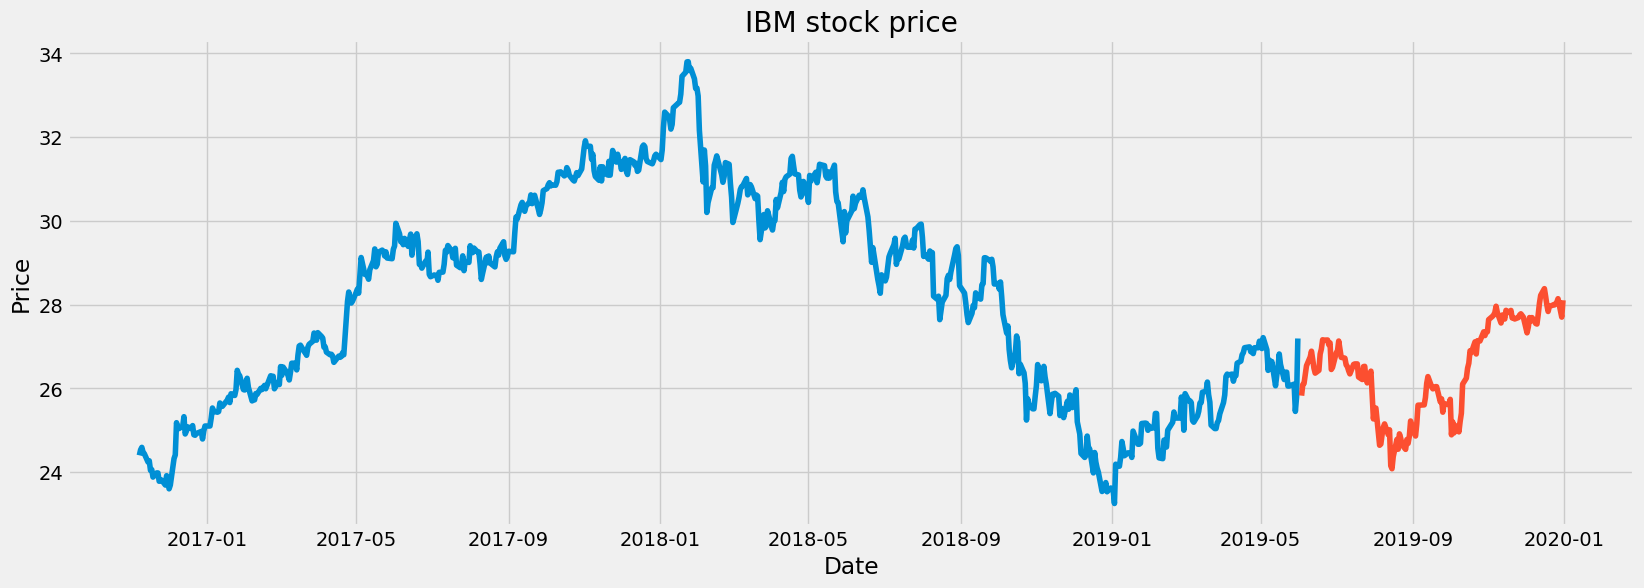

In [ ]:
# graph 2019
dax_test_2019["date"] = pd.to_datetime(dax_test_2019["date"])
dax_train_2019["date"] = pd.to_datetime(dax_train_2019["date"])

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(dax_train_2019["date"], dax_train_2019["close"])
ax.plot(dax_test_2019["date"], dax_test_2019["close"])
plt.title('IBM stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

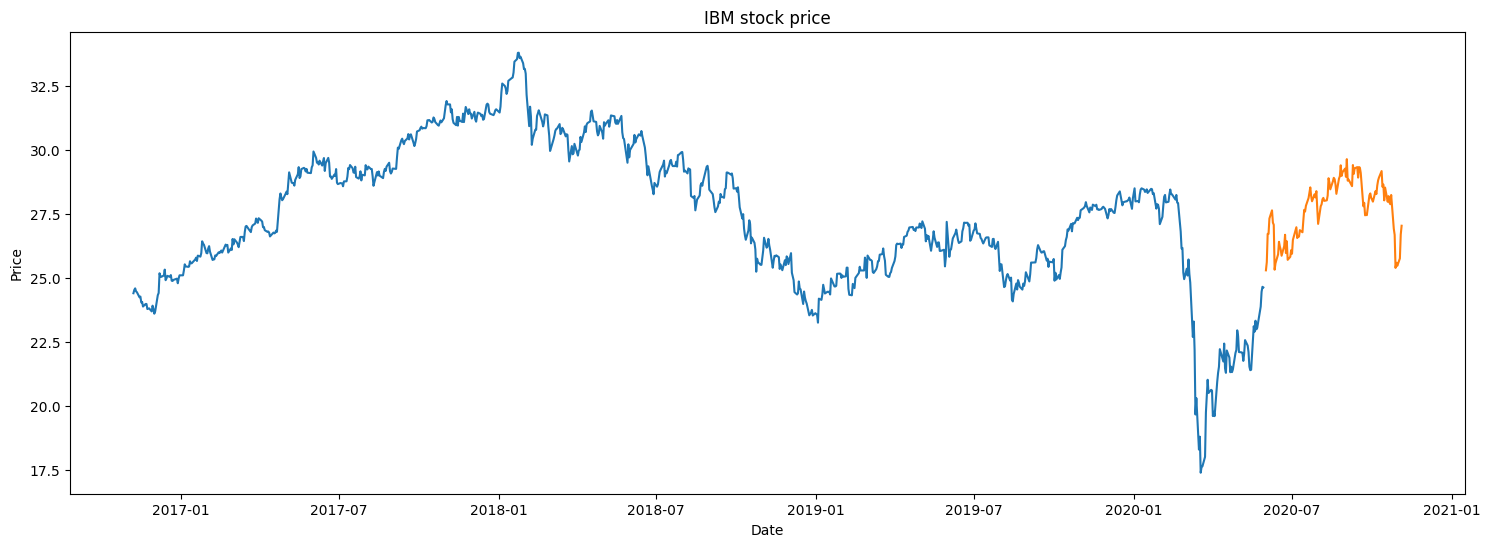

In [ ]:
# graph 2020
dax_test_2020["date"] = pd.to_datetime(dax_test_2020["date"])
dax_train_2020["date"] = pd.to_datetime(dax_train_2020["date"])

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(dax_train_2020["date"], dax_train_2020["close"])
ax.plot(dax_test_2020["date"], dax_test_2020["close"])
plt.title('IBM stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
dax_train_2020.head()

,date,open,high,low,close,adj close,volume
0,2016-11-07,24.340000,24.440001,24.304001,24.400000,22.092239,2700
1,2016-11-08,24.559999,24.559999,24.520000,24.530001,22.209948,1100
2,2016-11-09,24.296000,24.610001,24.296000,24.590000,22.264271,900
3,2016-11-10,24.750000,24.750000,24.360001,24.474001,22.159245,4600
4,2016-11-11,24.410000,24.537001,24.410000,24.440001,22.128456,2700


In [ ]:
training_set= dax_train_2020.iloc[:, 4:5].values

In [ ]:
training_set

array([[24.4     ],
       [24.530001],
       [24.59    ],
       [24.474001],
       [24.440001],
       [24.24    ],
       [24.27    ],
       [24.040001],
       [24.059999],
       [23.879999],
       [23.98    ],
       [23.98    ],
       [23.781   ],
       [23.809999],
       [23.690001],
       [23.914   ],
       [23.780001],
       [23.6     ],
       [23.690001],
       [24.323   ],
       [24.41    ],
       [25.18    ],
       [25.049999],
       [25.039   ],
       [25.097   ],
       [25.323   ],
       [24.91    ],
       [24.98    ],
       [25.08    ],
       [25.038   ],
       [25.110001],
       [24.889999],
       [24.879999],
       [24.921   ],
       [24.969999],
       [24.790001],
       [24.98    ],
       [25.1     ],
       [25.1     ],
       [25.290001],
       [25.530001],
       [25.450001],
       [25.43    ],
       [25.445   ],
       [25.65    ],
       [25.57    ],
       [25.57    ],
       [25.719999],
       [25.790001],
       [25.66    ],


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(895, 1)

In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 11s 135ms/step - loss: 0.0520
Epoch 2/100
27/27 [==============================] - 5s 169ms/step - loss: 0.0147
Epoch 3/100
27/27 [==============================] - 3s 112ms/step - loss: 0.0106
Epoch 4/100
27/27 [==============================] - 3s 112ms/step - loss: 0.0110
Epoch 5/100
27/27 [==============================] - 3s 124ms/step - loss: 0.0094
Epoch 6/100
27/27 [==============================] - 6s 217ms/step - loss: 0.0083
Epoch 7/100
27/27 [==============================] - 4s 154ms/step - loss: 0.0085
Epoch 8/100
27/27 [==============================] - 3s 114ms/step - loss: 0.0077
Epoch 9/100
27/27 [==============================] - 3s 113ms/step - loss: 0.0093
Epoch 10/100
27/27 [==============================] - 4s 141ms/step - loss: 0.0074
Epoch 11/100
27/27 [==============================] - 4s 163ms/step - loss: 0.0071
Epoch 12/100
27/27 [==============================] - 3s 113ms/step - loss: 0.0074
Epoch 13/100

In [ ]:
real_stock_price = dax_test_2020.iloc[:, 4:5].values

In [ ]:
real_stock_price.shape

(111, 1)

In [ ]:
dataset_total = pd.concat((dax_train_2020['close'], dax_test_2020['close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dax_test_2020) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(real_stock_price)):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 0s 7ms/step


In [ ]:
dataset_total.shape

(1006,)

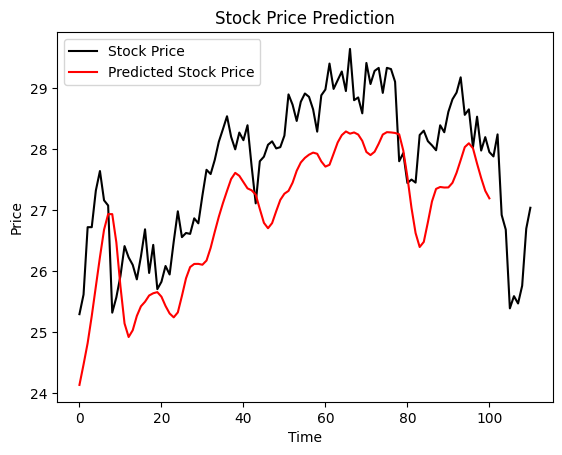

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()